# Домашнее задание №3 - Линейная регрессия для предсказания продолжительности жизни

В этой части домашки вам нужно сделать вашу первую полноценную **модель машинного обучения**!

Для этого мы возьмем датасет по **продолжительности жизни** и попробуем построить по нему **линейную регрессию**. Будем стараться выделить наиболее **важные для продолжительности жизни признаки**, а также постараемся сделать нашу модель **устойчивой** к новым данным - то есть избежать **переобучения**.

Описание датасета можно найти [тут](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Часть 1. EDA (15 баллов)

Загрузите датасет `Life Expectancy Data.csv`

Как и всегда, для начала вам нужно провести небольшое **EDA** ваших данных, убедиться в том, что в них нет **пропущенных значений** или еще каких-то **бед**.

Советуем **убрать** из рассмотрения **категориальные переменные**, чтобы они вас не смущали.

Помимо этого, обратите внимание на **стандартизацию** ваших данных. Но с этим **не торопитесь**. Сделайте EDA и посмотрите, что будет, когда мы проведём разбиение данных на тестовую и тренировочную выборки.

In [63]:
df = pd.read_csv("Life Expectancy Data.csv", index_col=0)

In [64]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


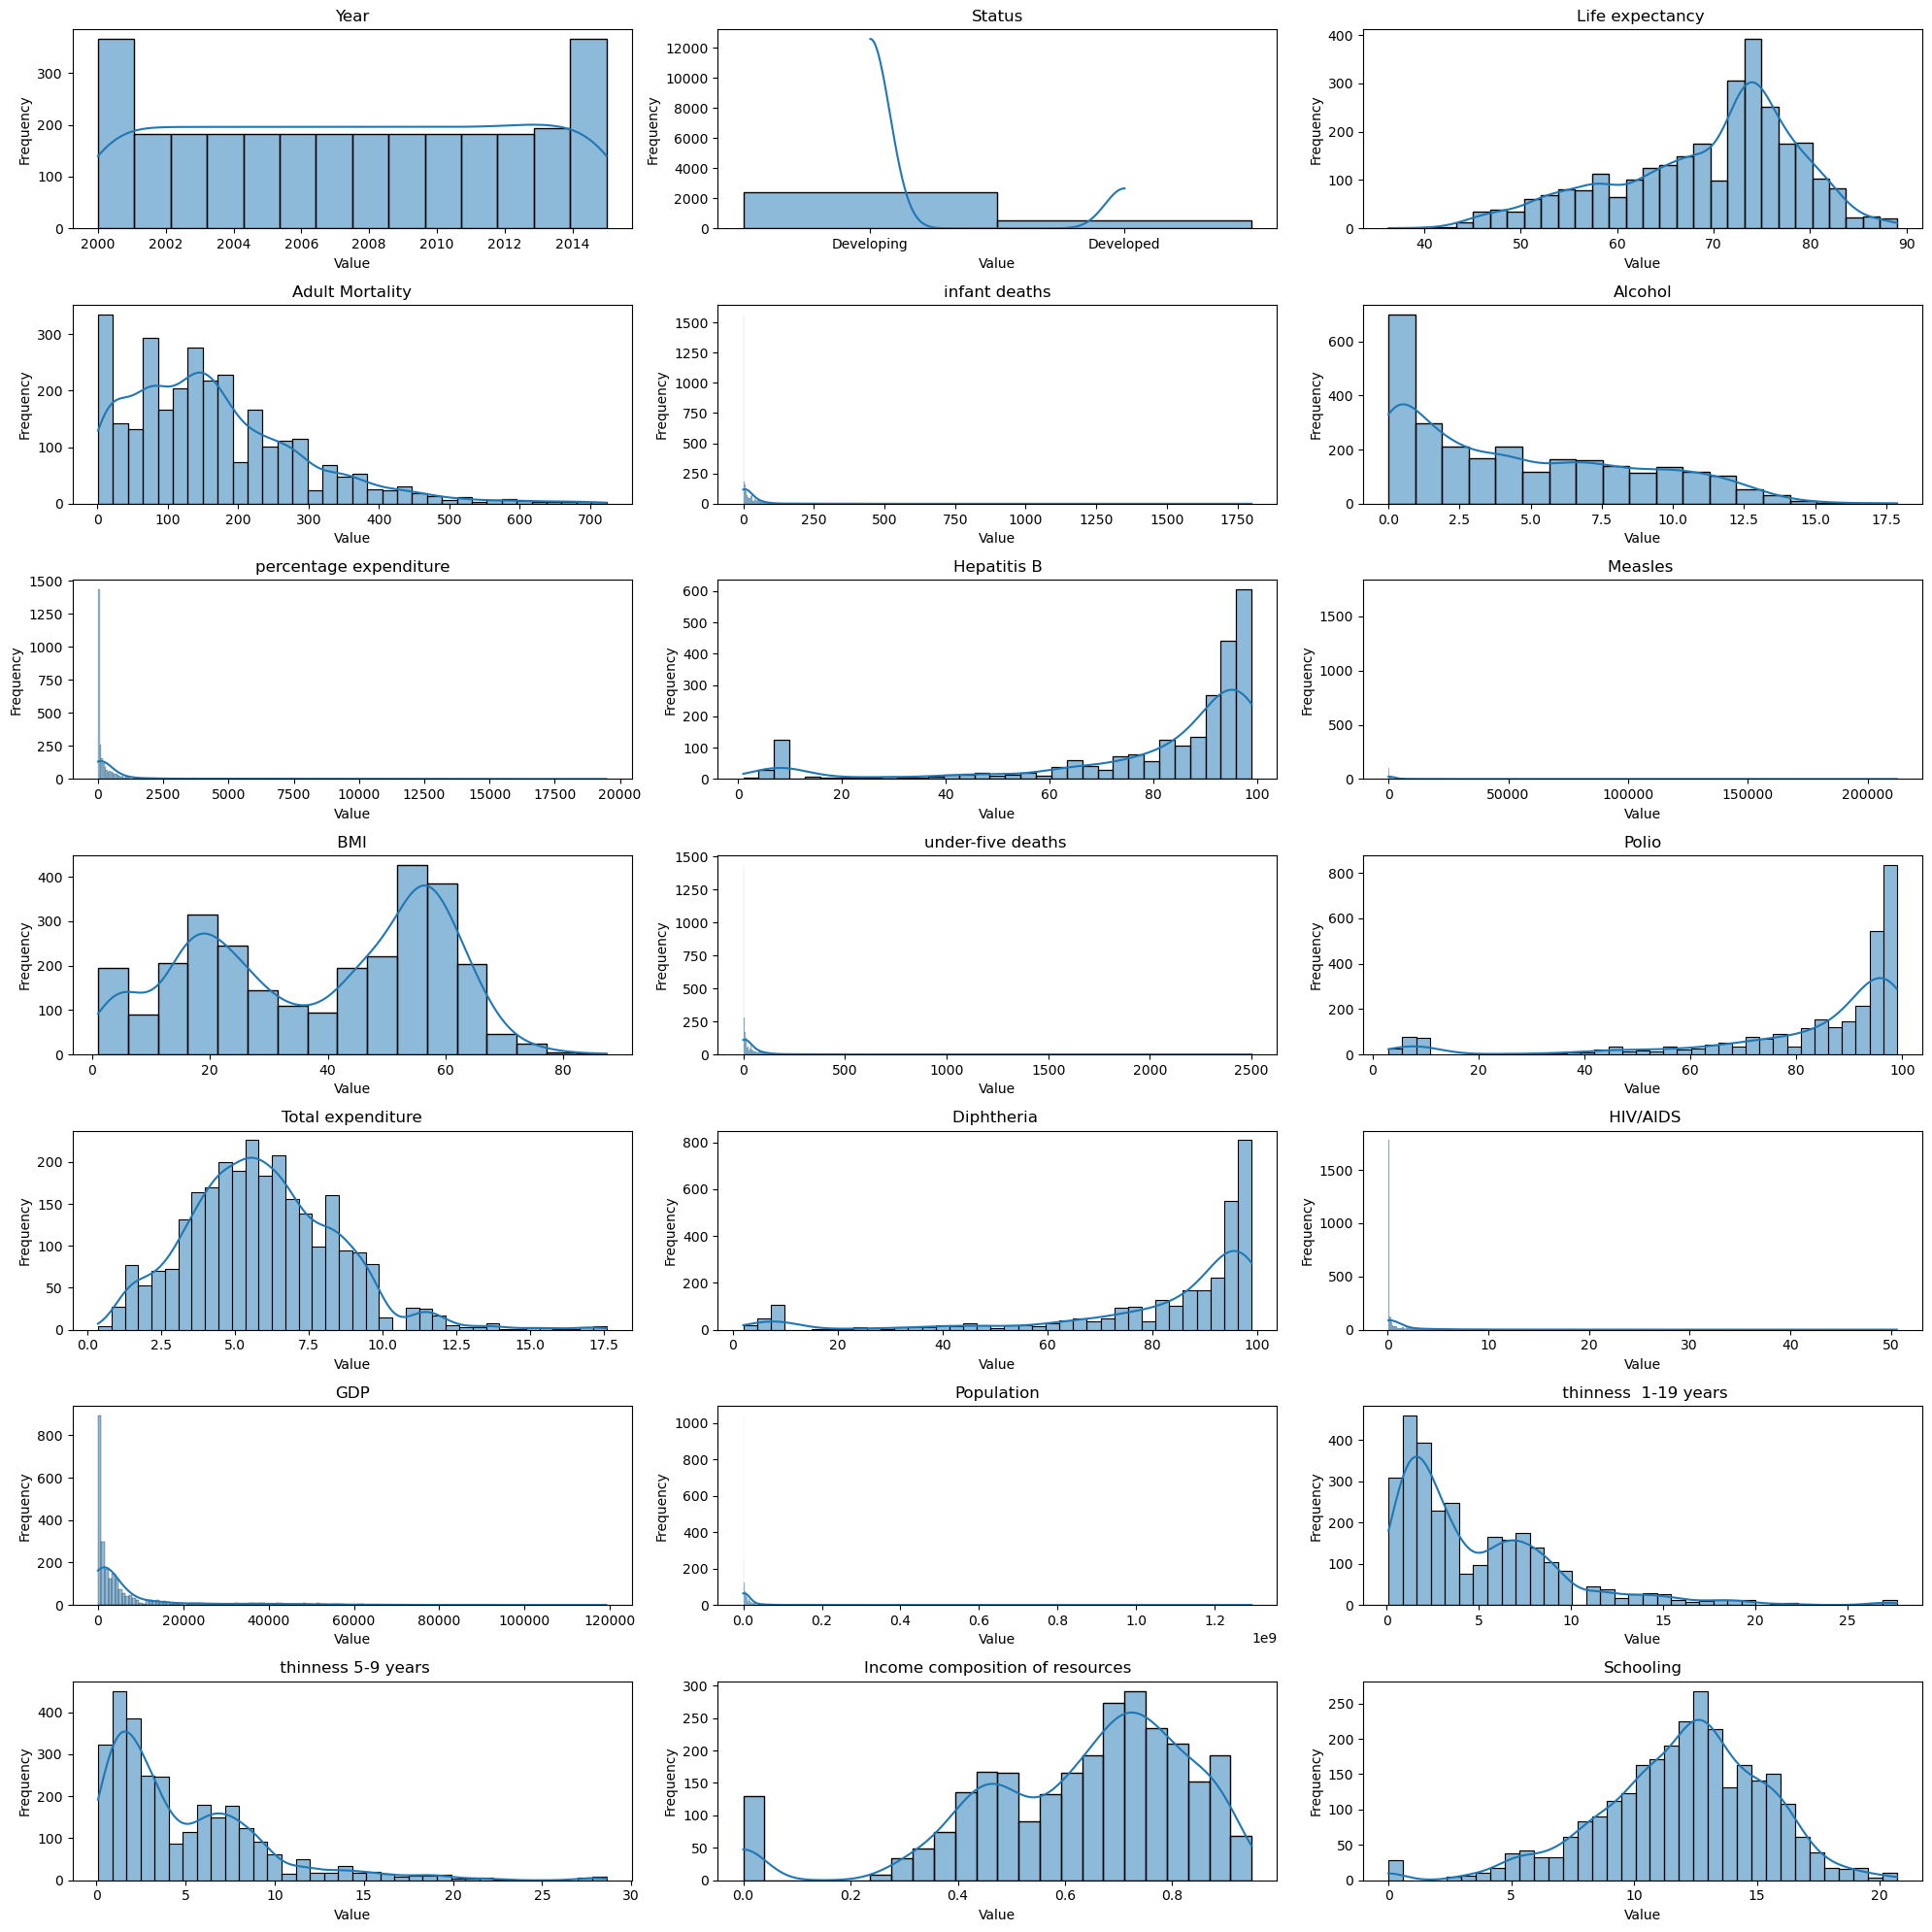

In [65]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for ax, col in zip(axes, df.columns):
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

for j in range(len(df.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Посмотрим есть ли у нас пропущенные значения и удалим их

In [66]:
df.isna().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [67]:
df_new = df.dropna()

In [68]:
df_new.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


Рассмотрим категориальные переменные. Им оказался статус, удалим его

In [69]:
df_new.dtypes

Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [70]:
df_new = df_new.drop("Status", axis=1)

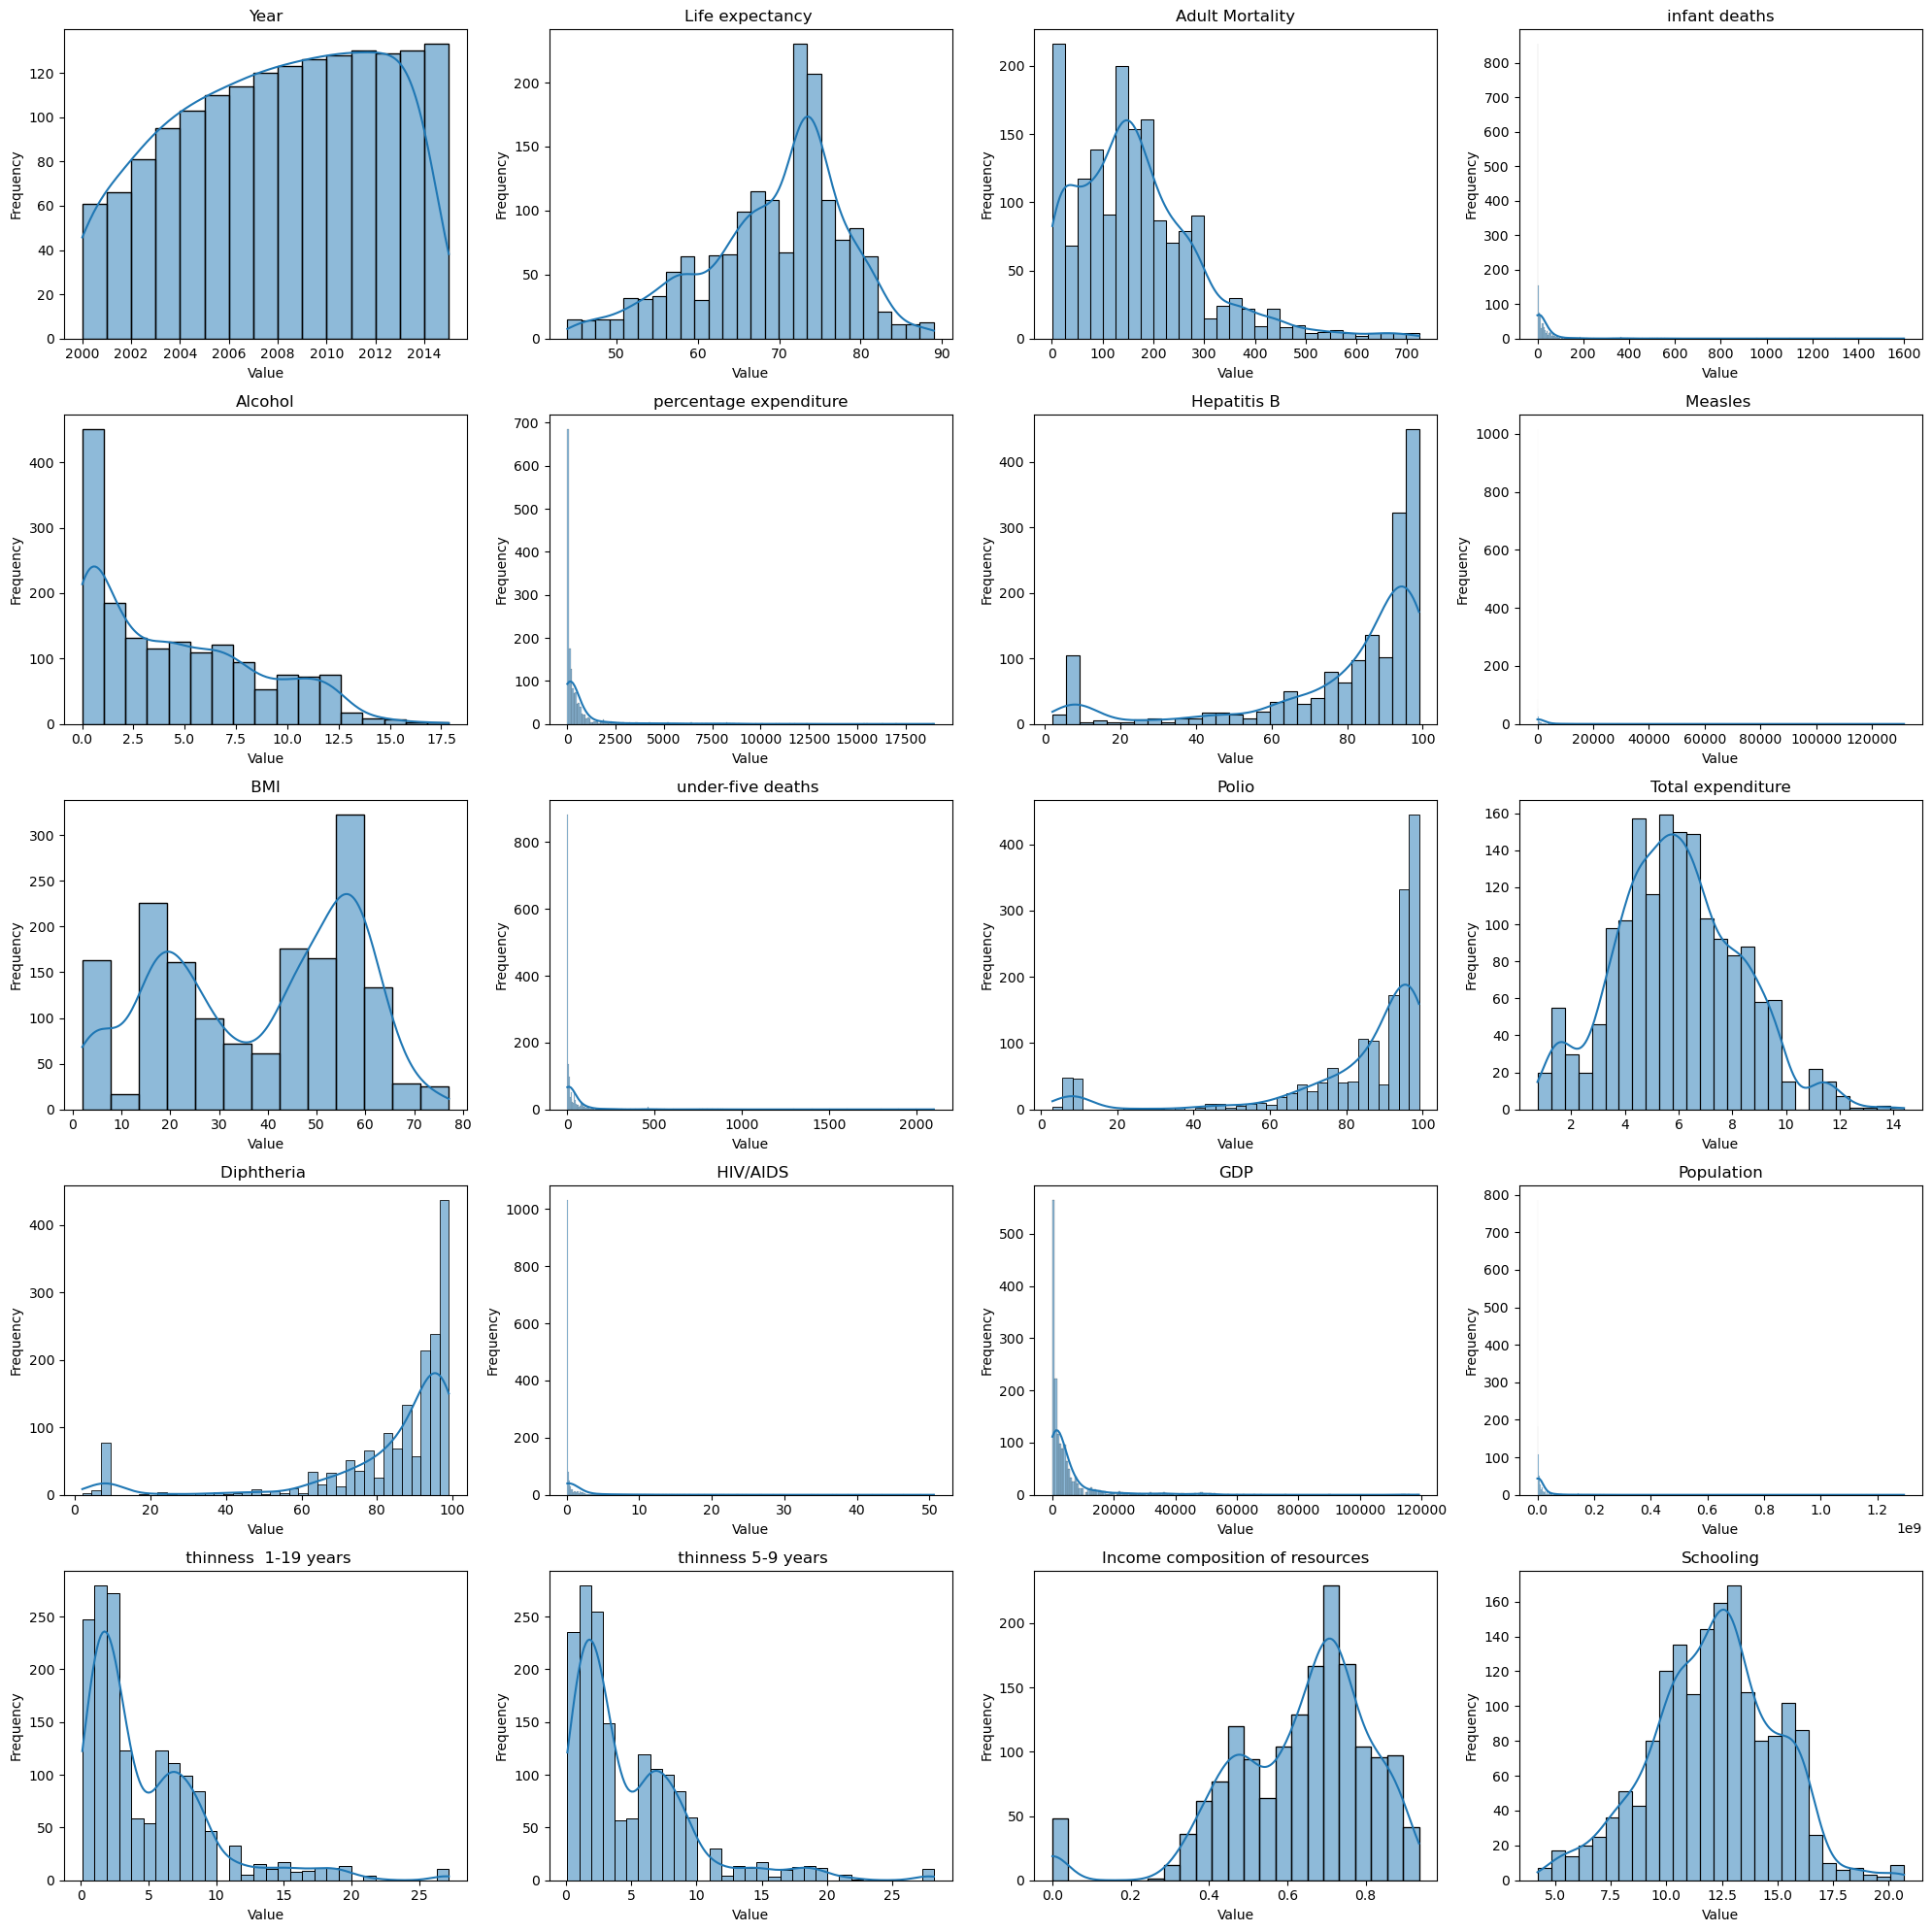

In [71]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for ax, col in zip(axes, df_new.columns):
    sns.histplot(df_new[col].dropna(), kde=True, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

for j in range(len(df_new.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Найдите что из этого **фичи**, что из этого **таргет** и положите соответствующие данные в X (фичи) и y (таргетная переменная).

In [72]:
X = df_new.drop("Life expectancy ", axis = 1)
y = df_new["Life expectancy "]

Мы хотим предсказать продолжительность жизни, соответственно это таргеттная переменная

После всего этого вам нужно будет разбить датасет на **тренировочную и тестовую выборки**. 

Тестовая выборка понадобится нам для того, чтобы оценить, насколько наша модель переобучилась. Для этого используйте функцию [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Не забудьте установить какое-то значение в `random_seed` для воспроизводимости. И определите соотношение train/test в процентах через параметр `test_size`

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,

                                                    random_state=42)

И вот только теперь **время для стандартизации** ваших данных и вот почему.

Вы уже знаете, что перед тем как положить **ваши данные** в модель их нужно привести к более менее одной и той же шкале, то есть **стандартизовать**. Для этого можно использовать уже наш любимый `StandardScaler`. У него есть `fit`, и есть `transform`. Но его **нельзя использовать на всём** нашем датасете!

Дело в том, что при работе с моделями машинного обучения мы очень **боимся раньше времени "показать" данные тренировочной выборки** моделе, aka *Data linkage* или утечка данных. Представьте, что у вас есть класс учеников, которые кое-как подглядели ответы на контрольную, а вам нужно оценить **реальные знания**. Но ведь так будет нечестно. Вы потом скажете завучу, что ребята хорошо знают материал, умеют обобщать и справляться с разными вариациями стандартных задач, но ведь это неправда. 

Когда вы фитите скейлер на **всём датасете**, вы вычисляете среднее и дисперсию по **всем-всем данным**, и по трейну и по тесту, а значит неизбежно **даёте моделе подглядеть** ваш тест, который мы так бережно хотим спрятать. Поэтому вот как вам обычно нужно действовать:
* загрузили датасет
* сделали EDA, выбрали фичи и всё такое
* разбили на трейн и тест
* зафитили скейлер **только на трейне**
* трансофрмировали данные трейна
* трансформировали данные теста

Попробуйте ниже!

In [74]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Часть 2. Создание и сравнение моделей (35 баллов)

Создайте две модели - обычную **линейную регрессию** и **ElasticNet**. 

In [75]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_predict = lr.predict(X_test_scaled)
y_train_pred_lr = lr.predict(X_train_scaled)

In [76]:
en = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
en.fit(X_train_scaled, y_train)
y_predict_en = en.predict(X_test_scaled)
y_train_pred_en = en.predict(X_train_scaled)

Проанализируйте значения метрик **MSE, RMSE, MAE, R-squared, adjusted R-squared** для полученных моделей на тренировочном датасете. Сделайте вывод о лучшей модели. 

Залезьте в документацию и обратите внимание на **порядок**, в котором нужно передавать переменные в функции. Есть разница между тем, чтобы первой сообщать настоящие значения y, а потом предсказанные и наоборот.

In [77]:

# Количество наблюдений (n) и число фич (p)
n = X_train_scaled.shape[0]
p = X_train_scaled.shape[1]

# --- Модель LinearRegression ---
mse_lr = mean_squared_error(y_train, y_train_pred_lr)  # Обратите внимание: первым аргументом передаются истинные значения!
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
r2_lr = r2_score(y_train, y_train_pred_lr)
adj_r2_lr = 1 - (1 - r2_lr) * (n - 1) / (n - p - 1)

print("Linear Regression:")
print(f"MSE: {mse_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")
print(f"MAE: {mae_lr:.3f}")
print(f"R-squared: {r2_lr:.3f}")
print(f"Adjusted R-squared: {adj_r2_lr:.3f}")

Linear Regression:
MSE: 12.472
RMSE: 3.532
MAE: 2.714
R-squared: 0.842
Adjusted R-squared: 0.839


In [78]:
mse_en = mean_squared_error(y_train, y_train_pred_en)
rmse_en = np.sqrt(mse_en)
mae_en = mean_absolute_error(y_train, y_train_pred_en)
r2_en = r2_score(y_train, y_train_pred_en)
adj_r2_en = 1 - (1 - r2_en) * (n - 1) / (n - p - 1)

print("ElasticNet:")
print(f"MSE: {mse_en:.3f}")
print(f"RMSE: {rmse_en:.3f}")
print(f"MAE: {mae_en:.3f}")
print(f"R-squared: {r2_en:.3f}")
print(f"Adjusted R-squared: {adj_r2_en:.3f}")

ElasticNet:
MSE: 16.962
RMSE: 4.118
MAE: 3.204
R-squared: 0.785
Adjusted R-squared: 0.782


Нужно, чтобы ошибки были минимальны, а R-squared максимальным. В модели линейной регрессии MSE, RMSE, MAE меньше, чем в ElasticNet, а значения R-squared, adjusted R-squared большн. Соответственно модель линейной регрессии лучше.

*И не забывайте про вторую модель*

In [79]:
# YOUR CODE HERE

Для обеих моделей можно получить **вектор значений весов** при переменных. Эти веса указывают на вклад переменной в регрессию. Какие переменные наиболее важны для предсказания *life expectancy* по мнению обеих моделей?

In [80]:

coef_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
})
coef_lr['abs_coef'] = coef_lr['Coefficient'].abs()
coef_lr_sorted = coef_lr.sort_values(by='abs_coef', ascending=False)

print("Коэффициенты для модели LinearRegression, отсортированные по абсолютной важности:")
print(coef_lr_sorted)



Коэффициенты для модели LinearRegression, отсортированные по абсолютной важности:
                            Feature  Coefficient   abs_coef
8                under-five deaths    -10.891621  10.891621
2                     infant deaths    10.743893  10.743893
18                        Schooling     2.766064   2.766064
12                         HIV/AIDS    -2.757225   2.757225
1                   Adult Mortality    -2.105255   2.105255
17  Income composition of resources     1.781011   1.781011
4            percentage expenditure     0.684952   0.684952
7                              BMI      0.505596   0.505596
3                           Alcohol    -0.481612   0.481612
0                              Year    -0.469442   0.469442
11                      Diphtheria      0.283144   0.283144
10                Total expenditure     0.256404   0.256404
16               thinness 5-9 years    -0.237419   0.237419
9                             Polio     0.179007   0.179007
15             thi

In [81]:

coef_en = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': en.coef_
})
coef_en['abs_coef'] = coef_en['Coefficient'].abs()
coef_en_sorted = coef_en.sort_values(by='abs_coef', ascending=False)

print("\nКоэффициенты для модели ElasticNet, отсортированные по абсолютной важности:")
print(coef_en_sorted)


Коэффициенты для модели ElasticNet, отсортированные по абсолютной важности:
                            Feature  Coefficient  abs_coef
1                   Adult Mortality    -1.834303  1.834303
12                         HIV/AIDS    -1.795565  1.795565
18                        Schooling     1.721373  1.721373
17  Income composition of resources     1.471784  1.471784
7                              BMI      0.648286  0.648286
13                              GDP     0.379383  0.379383
4            percentage expenditure     0.328754  0.328754
15             thinness  1-19 years    -0.312393  0.312393
11                      Diphtheria      0.281976  0.281976
16               thinness 5-9 years    -0.256898  0.256898
9                             Polio     0.183087  0.183087
2                     infant deaths    -0.000000  0.000000
0                              Year    -0.000000  0.000000
10                Total expenditure     0.000000  0.000000
6                          Measles    

По мнению модели линейной регрессии наибольшее влияние на продолжительность жизни оказывает смертность детей в возрасте до пяти лет и детская смертность, а по мнению ElasticNet взрослая смертность и ВИЧ/СПИД. Мне кажется , что вторая модель более логична.

Теперь нам нужно **оценить, не переобучаются ли наши модели**. Для этого вспомним о тестовой выборке и получим значения метрик для нее.

In [82]:
# YOUR CODE HERE

In [83]:
y_test_pred_lr = lr.predict(X_test_scaled)
y_test_pred_en = en.predict(X_test_scaled)

n_test = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]

mse_lr_test = mean_squared_error(y_test, y_test_pred_lr)  # истинные значения сначала, потом предсказанные
rmse_lr_test = np.sqrt(mse_lr_test)
mae_lr_test = mean_absolute_error(y_test, y_test_pred_lr)
r2_lr_test = r2_score(y_test, y_test_pred_lr)
adj_r2_lr_test = 1 - (1 - r2_lr_test) * (n_test - 1) / (n_test - p - 1)

print("Метрики модели Linear Regression на тестовой выборке:")
print(f"MSE: {mse_lr_test:.3f}")
print(f"RMSE: {rmse_lr_test:.3f}")
print(f"MAE: {mae_lr_test:.3f}")
print(f"R-squared: {r2_lr_test:.3f}")
print(f"Adjusted R-squared: {adj_r2_lr_test:.3f}")

mse_en_test = mean_squared_error(y_test, y_test_pred_en)
rmse_en_test = np.sqrt(mse_en_test)
mae_en_test = mean_absolute_error(y_test, y_test_pred_en)
r2_en_test = r2_score(y_test, y_test_pred_en)
adj_r2_en_test = 1 - (1 - r2_en_test) * (n_test - 1) / (n_test - p - 1)

print("\nМетрики модели ElasticNet на тестовой выборке:")
print(f"MSE: {mse_en_test:.3f}")
print(f"RMSE: {rmse_en_test:.3f}")
print(f"MAE: {mae_en_test:.3f}")
print(f"R-squared: {r2_en_test:.3f}")
print(f"Adjusted R-squared: {adj_r2_en_test:.3f}")

Метрики модели Linear Regression на тестовой выборке:
MSE: 13.072
RMSE: 3.615
MAE: 2.742
R-squared: 0.816
Adjusted R-squared: 0.805

Метрики модели ElasticNet на тестовой выборке:
MSE: 17.319
RMSE: 4.162
MAE: 3.214
R-squared: 0.756
Adjusted R-squared: 0.741


Сравним со значениями на тренировочной выборке. Разницы между тренировочными и тестовыми метриками почи нет, что свидетельствует о том, что модель не переобучается.

Linear Regression train:
MSE: 12.472
RMSE: 3.532
MAE: 2.714
R-squared: 0.842
Adjusted R-squared: 0.839

ElasticNet train :
MSE: 16.962
RMSE: 4.118
MAE: 3.204
R-squared: 0.785
Adjusted R-squared: 0.782

**(доп задание: 15 баллов)** А теперь мы предлагаем вам немного поиграть **с соотношением тестовой и тренировочной выборки**. Как мы уже говорили на лекции обычно берётся 80% данных в тест и 20% в трейн. Попробуйте сделать **наоборот** и посмотреть что получится. Не забудьте описать ваши наблюдения.

In [ ]:
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X, y, test_size=0.8, random_state=42)


scaler_rev = StandardScaler()
scaler_rev.fit(X_train_rev)

X_train_rev_scaled = scaler_rev.transform(X_train_rev)
X_test_rev_scaled = scaler_rev.transform(X_test_rev)


lr_rev = LinearRegression()
lr_rev.fit(X_train_rev_scaled, y_train_rev)
y_train_pred_lr_rev = lr_rev.predict(X_train_rev_scaled)
y_test_pred_lr_rev = lr_rev.predict(X_test_rev_scaled)


en_rev = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
en_rev.fit(X_train_rev_scaled, y_train_rev)
y_train_pred_en_rev = en_rev.predict(X_train_rev_scaled)
y_test_pred_en_rev = en_rev.predict(X_test_rev_scaled)


p = X_train_rev_scaled.shape[1]


n_train_rev = X_train_rev_scaled.shape[0]
n_test_rev = X_test_rev_scaled.shape[0]

mse_lr_train_rev = mean_squared_error(y_train_rev, y_train_pred_lr_rev)
rmse_lr_train_rev = np.sqrt(mse_lr_train_rev)
mae_lr_train_rev = mean_absolute_error(y_train_rev, y_train_pred_lr_rev)
r2_lr_train_rev = r2_score(y_train_rev, y_train_pred_lr_rev)
adj_r2_lr_train_rev = 1 - (1 - r2_lr_train_rev) * (n_train_rev - 1) / (n_train_rev - p - 1)

mse_lr_test_rev = mean_squared_error(y_test_rev, y_test_pred_lr_rev)
rmse_lr_test_rev = np.sqrt(mse_lr_test_rev)
mae_lr_test_rev = mean_absolute_error(y_test_rev, y_test_pred_lr_rev)
r2_lr_test_rev = r2_score(y_test_rev, y_test_pred_lr_rev)
adj_r2_lr_test_rev = 1 - (1 - r2_lr_test_rev) * (n_test_rev - 1) / (n_test_rev - p - 1)


mse_en_train_rev = mean_squared_error(y_train_rev, y_train_pred_en_rev)
rmse_en_train_rev = np.sqrt(mse_en_train_rev)
mae_en_train_rev = mean_absolute_error(y_train_rev, y_train_pred_en_rev)
r2_en_train_rev = r2_score(y_train_rev, y_train_pred_en_rev)
adj_r2_en_train_rev = 1 - (1 - r2_en_train_rev) * (n_train_rev - 1) / (n_train_rev - p - 1)

mse_en_test_rev = mean_squared_error(y_test_rev, y_test_pred_en_rev)
rmse_en_test_rev = np.sqrt(mse_en_test_rev)
mae_en_test_rev = mean_absolute_error(y_test_rev, y_test_pred_en_rev)
r2_en_test_rev = r2_score(y_test_rev, y_test_pred_en_rev)
adj_r2_en_test_rev = 1 - (1 - r2_en_test_rev) * (n_test_rev - 1) / (n_test_rev - p - 1)

print("=== Linear Regression (20% Train, 80% Test) ===")
print("Train set:")
print(f"MSE: {mse_lr_train_rev:.3f}")
print(f"RMSE: {rmse_lr_train_rev:.3f}")
print(f"MAE: {mae_lr_train_rev:.3f}")
print(f"R-squared: {r2_lr_train_rev:.3f}")
print(f"Adjusted R-squared: {adj_r2_lr_train_rev:.3f}")

print("Test set:")
print(f"MSE: {mse_lr_test_rev:.3f}")
print(f"RMSE: {rmse_lr_test_rev:.3f}")
print(f"MAE: {mae_lr_test_rev:.3f}")
print(f"R-squared: {r2_lr_test_rev:.3f}")
print(f"Adjusted R-squared: {adj_r2_lr_test_rev:.3f}")

print("\n=== ElasticNet (20% Train, 80% Test) ===")
print("Train set:")
print(f"MSE: {mse_en_train_rev:.3f}")
print(f"RMSE: {rmse_en_train_rev:.3f}")
print(f"MAE: {mae_en_train_rev:.3f}")
print(f"R-squared: {r2_en_train_rev:.3f}")
print(f"Adjusted R-squared: {adj_r2_en_train_rev:.3f}")

print("Test set:")
print(f"MSE: {mse_en_test_rev:.3f}")
print(f"RMSE: {rmse_en_test_rev:.3f}")
print(f"MAE: {mae_en_test_rev:.3f}")
print(f"R-squared: {r2_en_test_rev:.3f}")
print(f"Adjusted R-squared: {adj_r2_en_test_rev:.3f}")

=== Linear Regression (20% Train, 80% Test) ===
Train set:
MSE: 11.369
RMSE: 3.372
MAE: 2.594
R-squared: 0.831
Adjusted R-squared: 0.821
Test set:
MSE: 13.963
RMSE: 3.737
MAE: 2.889
R-squared: 0.825
Adjusted R-squared: 0.823

=== ElasticNet (20% Train, 80% Test) ===
Train set:
MSE: 15.543
RMSE: 3.942
MAE: 3.202
R-squared: 0.769
Adjusted R-squared: 0.755
Test set:
MSE: 19.736
RMSE: 4.443
MAE: 3.443
R-squared: 0.753
Adjusted R-squared: 0.749


Значение ошибок сттало меньше, р квадрат больше. Это говорит о том что при увеличении тренировочной выборки модель меньше ошибается, лучше обучается

Напишите нам ваши мысли о том, как вам эта часть домашки. Расскажите, что понравилось больше всего, что меньше. Сколько времени вы на неё потратили и где делали: в пути, дома, на работе, на учёбе.